# Import libraries: pandas, numpy, seaborn, matplotlib, and scipy 

In [1]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 


# Import merged data set 

In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'COPY_orders_products_new_columns.pkl'))
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_new_columns.pkl'))

# Bar Chart - orders_day_of_week 

In [7]:
ords_prods_merge.head()

,order_id,customer_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


<AxesSubplot:>

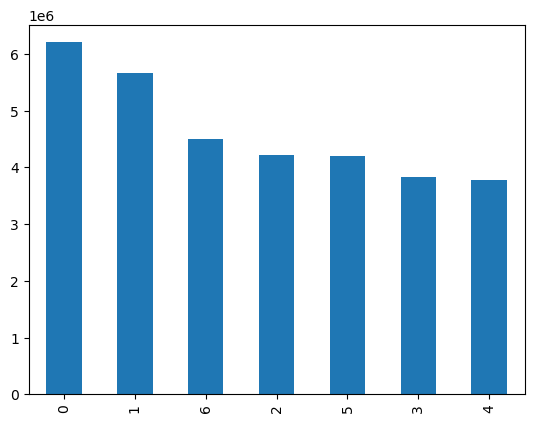

In [8]:
ords_prods_merge['order_dow'].value_counts().plot.bar()
#plot.bar() function tells Python to find the bar() function within the plot module.
#Always make sure to run this function on the frequency of the column, not the actual column itselt (costs time)

### Observations are ordered from largest to smallest, allows you to quickly determine the largest and smallest categories. If want to change this, then use sort_index() before the plot.bar() function. Will see the days of the week category in numerical order instead. Can also use the sort_index() function on the table of values for the frequencies. 

<AxesSubplot:>

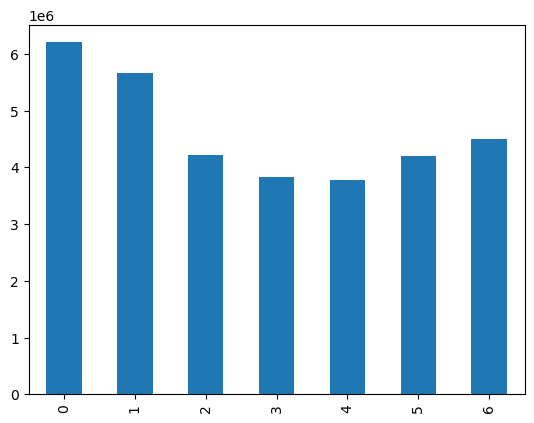

In [9]:
#Using sort_index()
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

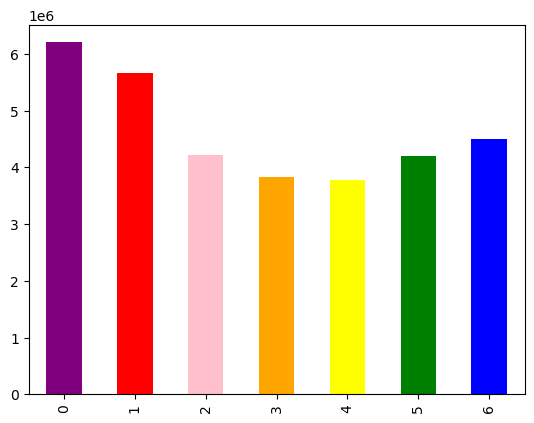

In [11]:
#Change the colors of the bars using the color argument in the plot.bar() function 
#Saved the bar chart as "bar" object
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

In [14]:
#Export the bar chart into an image file 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))
#Needed to manually create a new folder in the 04 Analysis folder or else get an error message. 

# Histogram - prices column

<AxesSubplot:ylabel='Frequency'>

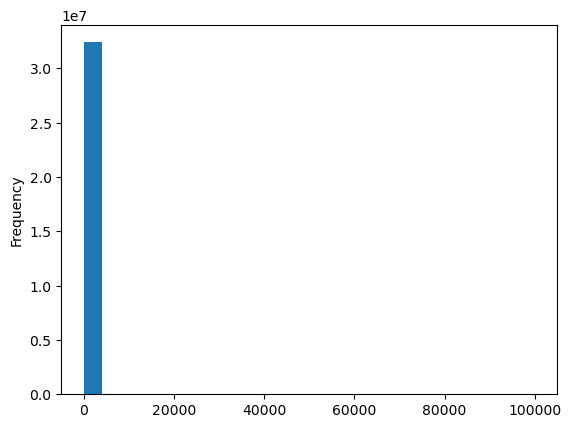

In [15]:
ords_prods_merge['prices'].plot.hist(bins=25)
#bins argument is how to determine the granularity of the histogram 
#smaller number of bins = denser bars and larger number of bins = sparser bars

In [16]:
#Integrity check 
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
#Check the maximum value
ords_prods_merge['prices'].max()

99999.0

### The mean and median are between 7 and 12 (realistic prices) and the max value is strange. How could an item cost $99,999.00$ dollars? This is forcing the histogram to shove all the values into one bar instead of 25. Can create a scatterplot to explore further the relationship between two variables. 

<AxesSubplot:xlabel='prices', ylabel='prices'>

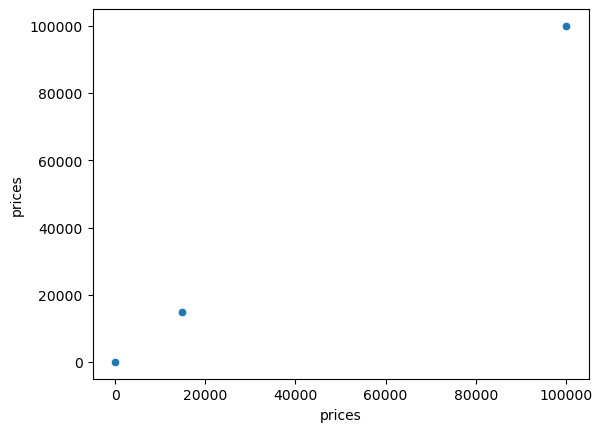

In [20]:
#Plot prices column against itself to find outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

### Scatter plot function from the seaborn library: within the () include arguments in the form of the axes. The mean of the column is around 12, so we expect to see data points distributed around this number. BUT there are two data points near 20,000 and 100000. The 100000 corresponds to the max value observed. Where is the 20,000 coming from? 

In [21]:
#Exploratory checks on the prices column 
#What values are above a threshold of 100?
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,customer_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Freqeunt customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Freqeunt customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Freqeunt customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,High-range product,Busiest day,Busiest days,Fewest orders,39,Regular customer,1106.743956,High spender,4.0,Freqeunt customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,4.0,Freqeunt customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Freqeunt customer


### There are 5,127 rows with outlier observations (prices > 100). Both the 14900 and the 99999 are skewing the charts. First step would be to consult the client about how to treat the values. Mark the values as missing since they do not make sense in terms of other values in the prices column. 

In [29]:
#Turn the outliers into NaN values 
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [30]:
ords_prods_merge['prices'].max()

25.0

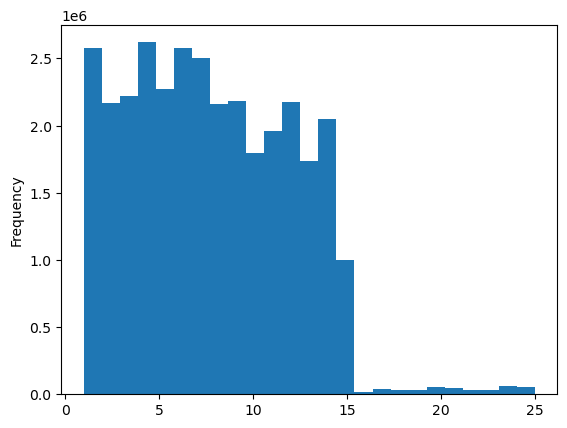

In [31]:
#Re-generate the histogram
hist = ords_prods_merge['prices'].plot.hist(bins=25)

### Most products are between 1 and 15 dollars, while a few are higher priced up to 25 dollars. To increase the level of granularity, increase the bins to 70. 

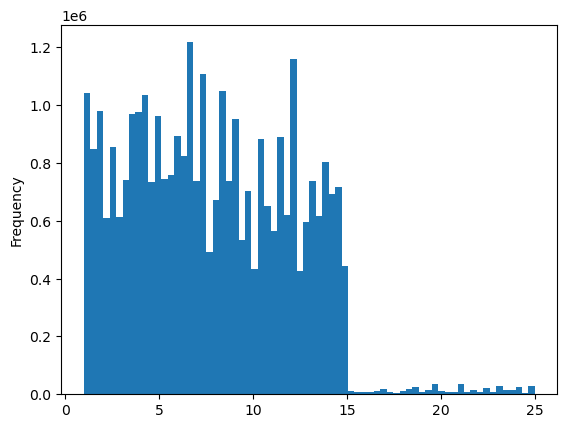

In [32]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins=70)

In [33]:
#Export the histograms
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_prices.png'))

# Creating a random sample from the dataframe 

In [4]:
#70/30 split for creating a random sample 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

### "seed" represents a random but reproducible pattern and Python will always give you the same set of random numbers rather than creating a new pattern of numbers every time you run the command. Your sample needs to be reproducible!! Then in the second line, we created a new list called "dev" where the boolean values are stored (0 to 1) and will get an output of True or False if <= to 0.7.

In [5]:
dev

array([False,  True, False, ...,  True,  True,  True])

### The np.random.rand() function creates the list of random floating numbers between 0 and 1. The len(ords_prods_merge) produces a value that represents the length of whatever you put inside it. The output should include 32,404,859 rows (entire dataframe). 

In [7]:
#Example of using the random function to produce a list of random numbers between 0 and 1. 10 random numbers
np.random.rand(10)

array([0.0164016 , 0.99588525, 0.68895442, 0.9491469 , 0.63012328,
       0.9192488 , 0.87788077, 0.3936537 , 0.64745848, 0.73786691])

### Created sample dataframes big and small from the ords_prods_merge dataframe. We are storing 70 percent of the dataframe in big and 30 percent in small by using the values in the dev list. The ~ stores everything that is false (or not "dev"). 

In [5]:
#Want to use the list to split the dataframe into two samples
big = ords_prods_merge[dev] #stores true values (70%)
small = ords_prods_merge[~dev] #stores false values (30%)

In [6]:
len(big) + len(small)

32404859

In [8]:
#Reduce the samples to only those columns needed for the chart (prices and orders_dow)
df_2 = small[['order_dow', 'prices']]

# Line Chart using df_2 dataframe

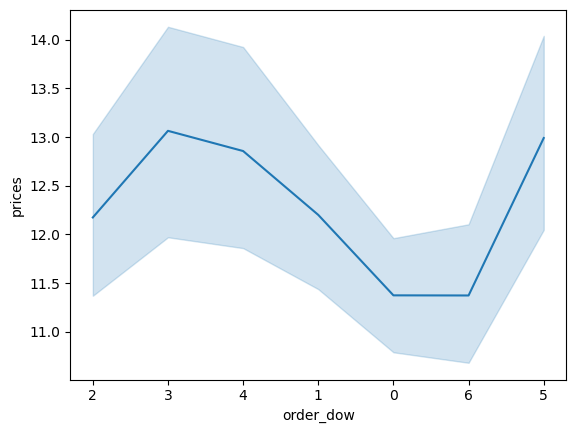

In [9]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

### Saving the line chart as the "line" object. Needs arguments: dataframe that you are creating the line chart from df_2, columns for each axis. The peak on day 5 = most money is spent on Thursday. The other peak is on Tuesday. The translucent blue bands around the trend line are called error bands. They represent the chart's confidence intervals. If this line were a prediction, there would be 95% probability that the predicted value would fall within the area of the error bands. 

In [10]:
#Export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))